In [1]:
#Import Library
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load Train and Test datasets
#Identify feature and response variable(s) and values must be numeric and numpy arrays
train=pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train_y=train['Loan_Status']
train_x=train.drop(["Loan_Status"],axis=1)

In [5]:
test=pd.read_csv('test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [42]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [6]:
dataset = [train,test]
dataset

[      Loan_ID  Gender Married Dependents     Education Self_Employed  \
 0    LP001002    Male      No          0      Graduate            No   
 1    LP001003    Male     Yes          1      Graduate            No   
 2    LP001005    Male     Yes          0      Graduate           Yes   
 3    LP001006    Male     Yes          0  Not Graduate            No   
 4    LP001008    Male      No          0      Graduate            No   
 5    LP001011    Male     Yes          2      Graduate           Yes   
 6    LP001013    Male     Yes          0  Not Graduate            No   
 7    LP001014    Male     Yes         3+      Graduate            No   
 8    LP001018    Male     Yes          2      Graduate            No   
 9    LP001020    Male     Yes          1      Graduate            No   
 10   LP001024    Male     Yes          2      Graduate            No   
 11   LP001027    Male     Yes          2      Graduate           NaN   
 12   LP001028    Male     Yes          2      Grad

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [ ]:
#mean
#median
#mode

In [8]:
for data in dataset:
    data["Gender"].ffill(inplace=True)
    data["Married"].ffill(inplace=True)
    data["Dependents"].ffill(inplace=True)
    data["Education"].ffill(inplace=True)
    data["Self_Employed"].bfill(inplace=True)
    data["Property_Area"].ffill(inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [10]:
#LoanAmount Loan_Amount_Term Credit_History
for data in dataset:
    data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)
    data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].median(),inplace=True)
    data["Credit_History"].ffill(inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [12]:
import seaborn as sns

C:\Users\Anil\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


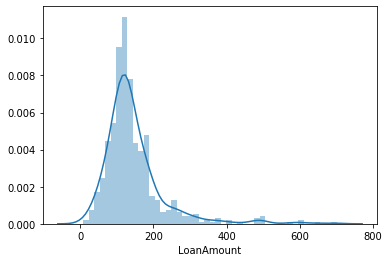

In [13]:
sns.distplot(train["LoanAmount"])

C:\Users\Anil\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


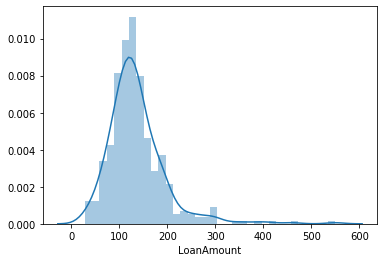

In [14]:
sns.distplot(test["LoanAmount"])

In [15]:
train.drop(["CoapplicantIncome"],inplace=True,axis=1)
test.drop(["CoapplicantIncome"],inplace=True,axis=1)

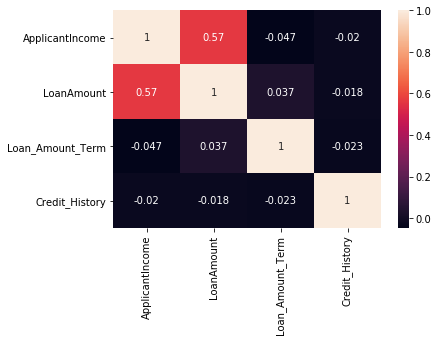

In [16]:
sns.heatmap(train.corr(),annot=True)

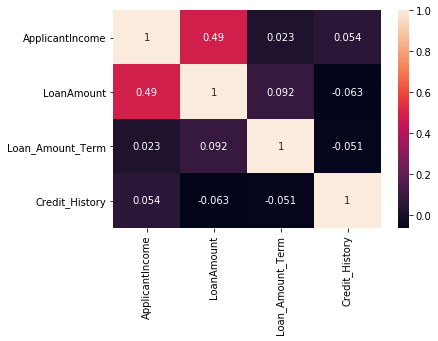

In [17]:
sns.heatmap(test.corr(),annot=True)

In [18]:
col = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for data in dataset:
    for c in col:
        data[c] = le.fit_transform(data[c])

In [20]:
train["Loan_Status"] = le.fit_transform(train["Loan_Status"])

In [21]:
train["Education"].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [22]:
train.drop(["Loan_ID"],inplace=True,axis=1)
test.drop(["Loan_ID"],inplace=True,axis=1)

In [23]:
x = train.iloc[:,0:10].values

In [24]:
y = train.iloc[:,10].values

In [34]:
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)
support.fit(x,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
     verbose=0)

In [45]:
y_test_pred = support.predict(test.values)

In [46]:
y_train_pred = support.predict(x)

In [47]:
import pandas
result = pd.DataFrame({"Actual values":y,"Predicted values":y_train_pred})
result.head(10)

,Actual values,Predicted values
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,1
8,1,1
9,0,1


In [48]:
acc_log = round(support.score(x,y)*100,2)
print(acc_log,"%")

68.73 %


In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_score(y_train_pred,y)

0.6872964169381107

In [44]:
svc = svm.SVC()
svc.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
svc_test_pred = svc.predict(test.values)

In [51]:
svc_train_pred = svc.predict(x)

In [52]:
result = pd.DataFrame({"Actual values":y,"Predicted values":svc_train_pred})
result.head(10)

,Actual values,Predicted values
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,0
8,1,1
9,0,0


In [53]:
accuracy_score(svc_train_pred,y)

0.996742671009772